In [181]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [182]:
df=pd.read_csv("https://raw.githubusercontent.com/virajcoder/Datasets/main/auto-mpg.csv")

In [183]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [184]:
df.shape

(398, 9)

In [185]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [186]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [188]:
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype(float)

In [189]:
median=df['horsepower'].median()
median

93.5

In [190]:
df['horsepower'].replace(np.nan,median,inplace=True)

In [191]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [192]:
### Duplicates

duplicate=df.duplicated()
duplicate.sum()

0

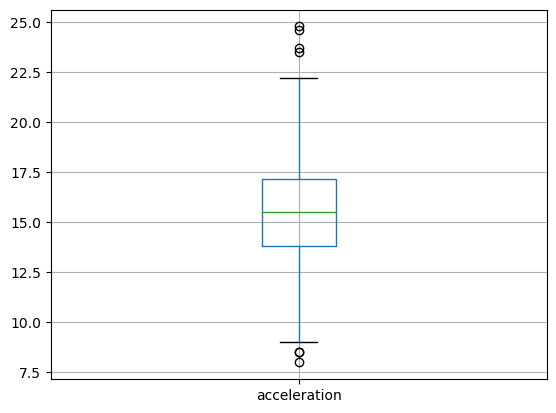

In [193]:
### Outliers

df.boxplot(column="acceleration")
plt.show()

In [194]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [195]:
lowacc,highacc=remove_outlier(df["acceleration"])

In [196]:
df["acceleration"]=np.where(df["acceleration"]>highacc,highacc,df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]<lowacc,lowacc,df["acceleration"])

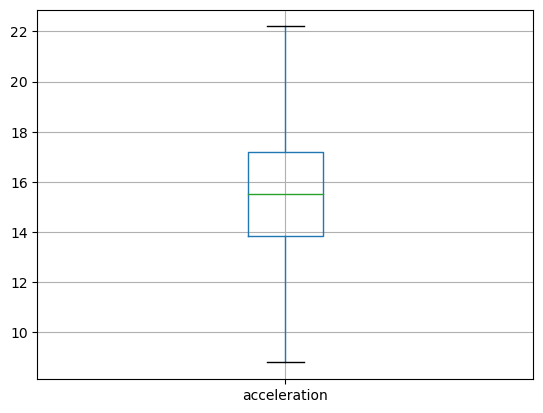

In [197]:
df.boxplot(column="acceleration")
plt.show()

In [198]:
### dropping column

df=df.drop("car name",axis=1)

In [199]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
273,23.9,4,119.0,97.0,2405,14.9,78,3
137,13.0,8,350.0,150.0,4699,14.5,74,1
193,24.0,6,200.0,81.0,3012,17.6,76,1
341,23.5,6,173.0,110.0,2725,12.6,81,1
128,15.0,6,250.0,100.0,3336,17.0,74,1
319,31.3,4,120.0,75.0,2542,17.5,80,3
125,20.0,6,198.0,95.0,3102,16.5,74,1
302,34.5,4,105.0,70.0,2150,14.9,79,1
135,18.0,6,225.0,105.0,3613,16.5,74,1
13,14.0,8,455.0,225.0,3086,10.0,70,1


In [200]:
df["origin"]=df["origin"].replace({1:"america", 2:"europe",3:"asia"})


In [201]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
189,15.5,8,304.0,120.0,3962,13.9,76,america
366,17.6,6,225.0,85.0,3465,16.6,81,america
118,24.0,4,116.0,75.0,2158,15.5,73,europe
375,36.0,4,105.0,74.0,1980,15.3,82,europe
18,27.0,4,97.0,88.0,2130,14.5,70,asia
154,15.0,6,250.0,72.0,3432,21.0,75,america
353,33.0,4,105.0,74.0,2190,14.2,81,europe
233,29.0,4,97.0,78.0,1940,14.5,77,europe
203,29.5,4,97.0,71.0,1825,12.2,76,europe
201,18.5,6,250.0,110.0,3645,16.2,76,america


In [202]:
df=pd.get_dummies(df,columns=["origin"])

In [203]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
18,27.0,4,97.0,88.0,2130,14.5,70,0,1,0
233,29.0,4,97.0,78.0,1940,14.5,77,0,0,1
204,32.0,4,85.0,70.0,1990,17.0,76,0,1,0
198,33.0,4,91.0,53.0,1795,17.4,76,0,1,0
97,18.0,6,225.0,105.0,3121,16.5,73,1,0,0
149,24.0,4,120.0,97.0,2489,15.0,74,0,1,0
379,36.0,4,98.0,70.0,2125,17.3,82,1,0,0
145,32.0,4,83.0,61.0,2003,19.0,74,0,1,0
173,24.0,4,119.0,97.0,2545,17.0,75,0,1,0
21,24.0,4,107.0,90.0,2430,14.5,70,0,0,1


In [204]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [206]:
# Lets build our linear model
# independant variable

X = df.drop(['mpg'], axis=1)

# the dependent variable

Y = df[['mpg']]

In [207]:
# split x and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Fit Linear Model

In [208]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression()

In [209]:
model_1.score(X_train, Y_train)

0.8225650800802112

In [210]:
con=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/concrete.csv")

In [212]:
con.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [213]:
con.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

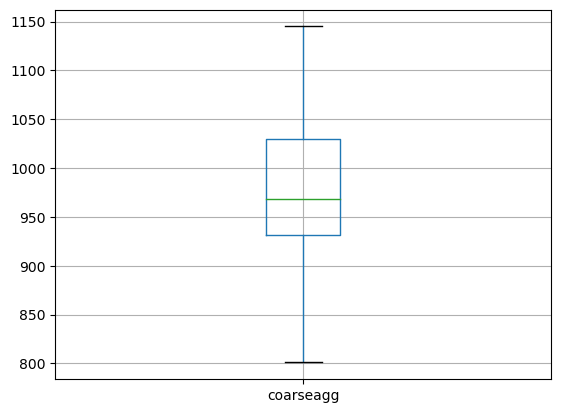

In [219]:
con.boxplot(column="coarseagg")
plt.show()